In this example we will see how to create simple rgb composites using landsat 8 bands, you can change the bands to create different color composites.

In [4]:
#import the library (Assuming the library is already installed )
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt

In [21]:
#True color composite using b2(blue),b3(green),b4(red) of landsat 8,you can choose your required band accordingly
input_band_paths = ['/content/input_raster/b2_norm.tif',
                    '/content/input_raster/b3_norm.tif',
                    '/content/input_raster/b4_norm.tif']

In [25]:
# Read input bands
bands = [] #empty list to hold the bands
for band_path in input_band_paths:
    with rasterio.open(band_path) as src:
        band = src.read(1)
        meta = src.meta
        bands.append(band)  #appending each bands to the list


In [23]:
#create true color composite by stacking rgb bands
rgb_composite = np.dstack(bands)

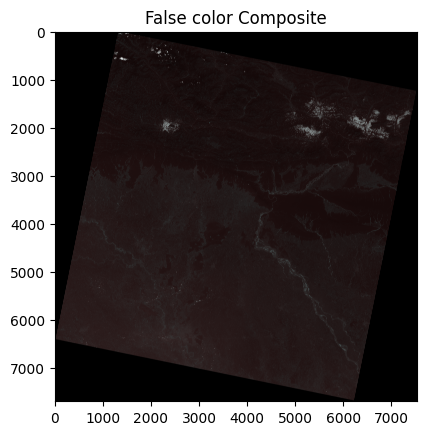

In [24]:
# Display the RGB composite
plt.imshow(rgb_composite)
plt.title('False color Composite')
plt.savefig('False Color composite')
plt.show()

In [27]:
output_path = '/content/output_raster/rgb_composite.tif'
# Update meta to reflect the number of layers
meta.update(count=rgb_composite.shape[2])

with rasterio.open(output_path, 'w', **meta) as dst:
    for i in range(rgb_composite.shape[2]):
        dst.write(rgb_composite[:, :, i], i + 1)
